In [1]:
import matplotlib.pyplot as plt
import os
from os.path import isfile
import h5py
import numpy as np

/home/changgeonlee/.pyenv/versions/3.7.1/envs/sound/lib/python3.7/site-packages/ipykernel_launcher.py:8: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  


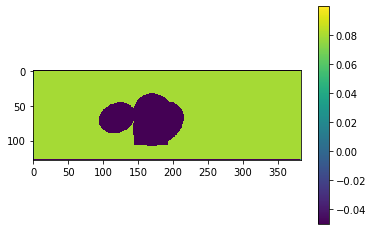

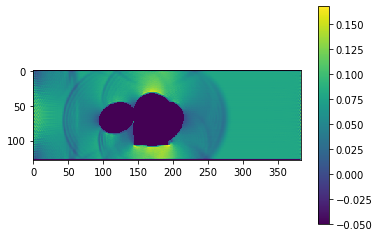

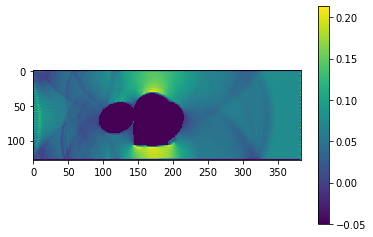

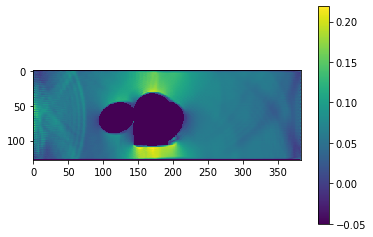

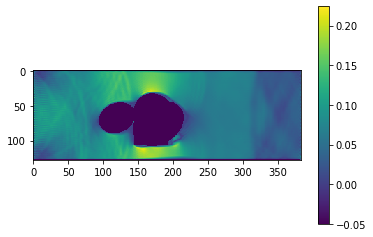

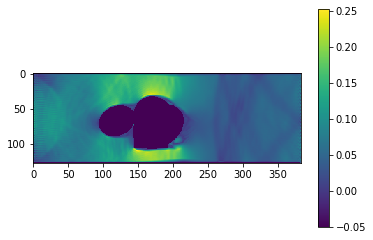

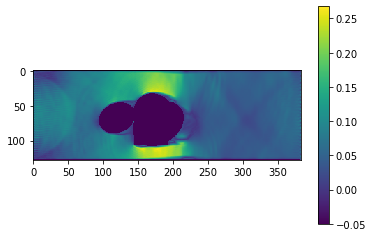

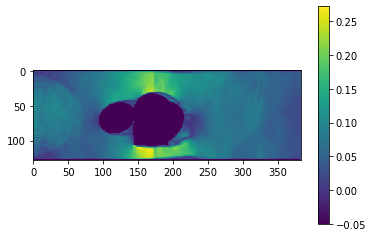

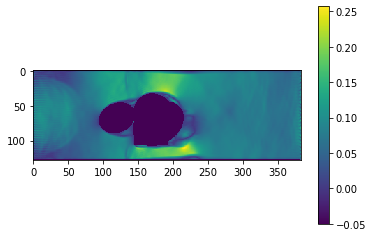

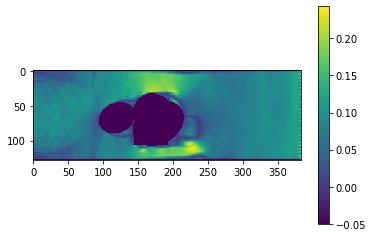

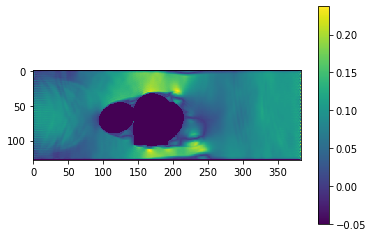

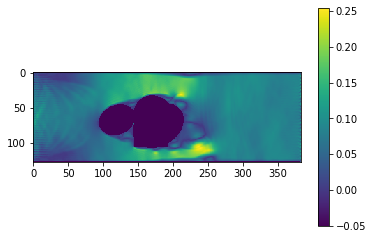

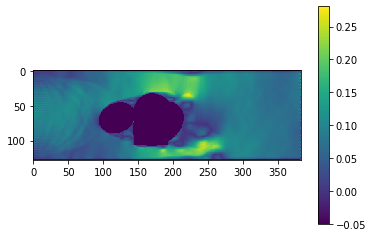

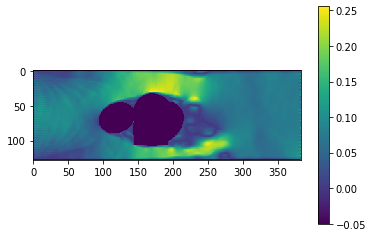

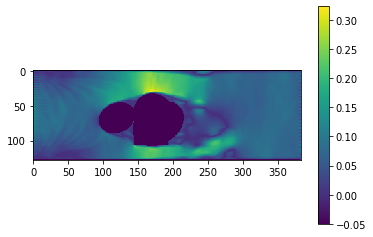

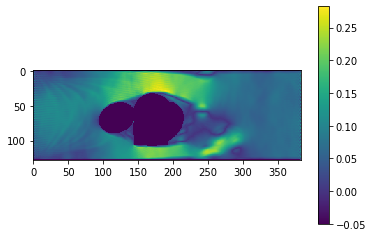

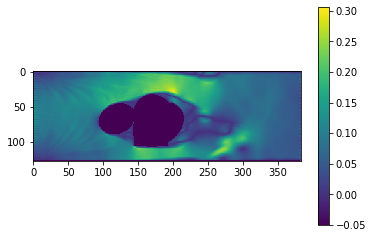

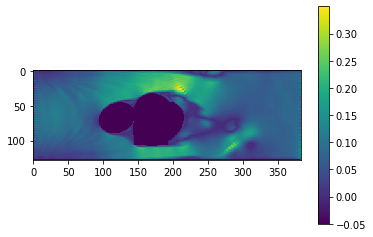

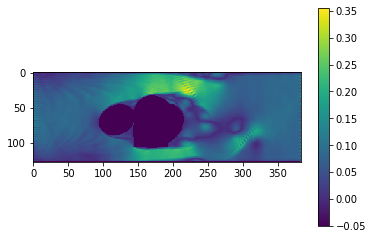

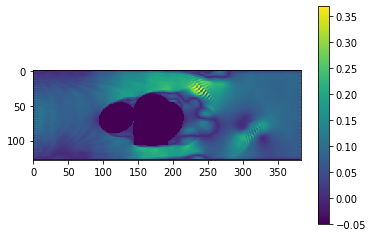

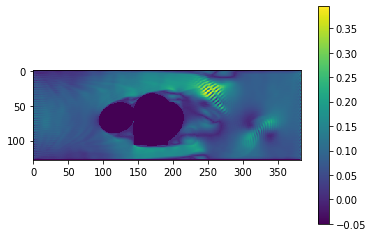

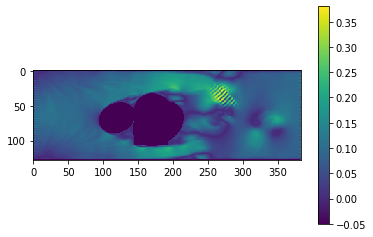

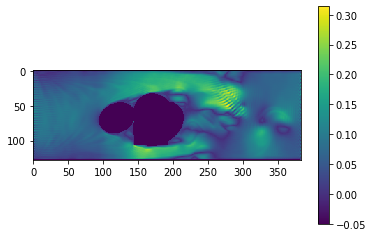

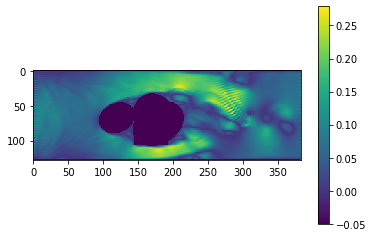

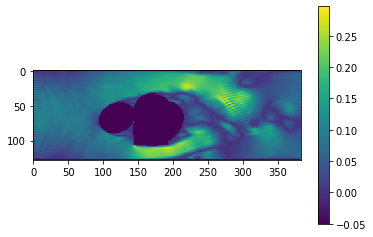

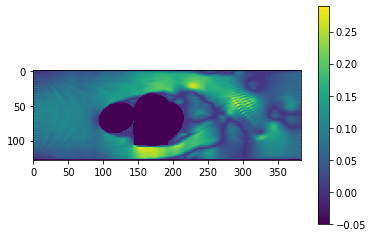

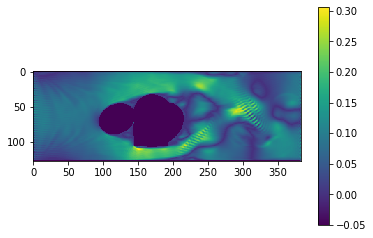

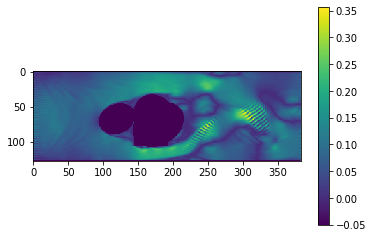

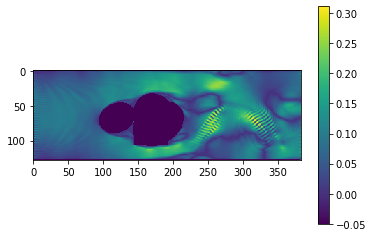

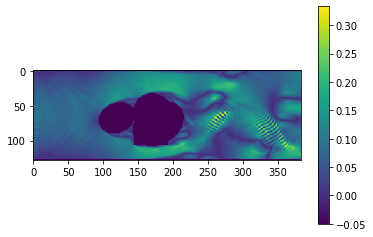

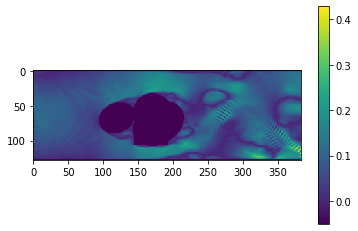

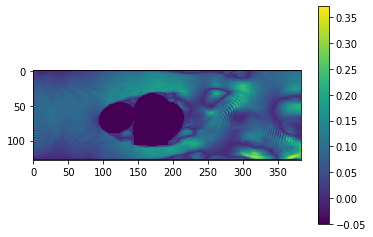

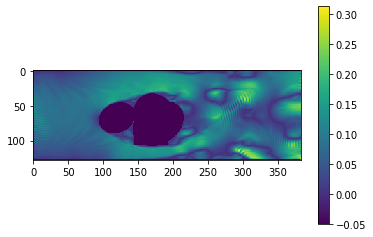

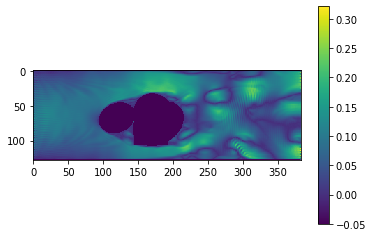

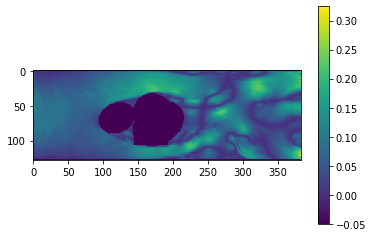

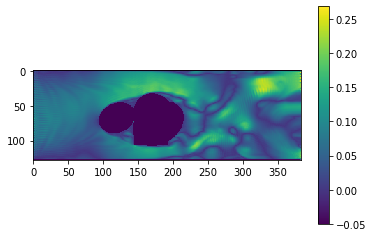

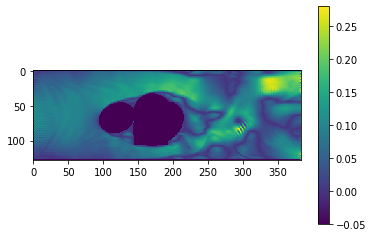

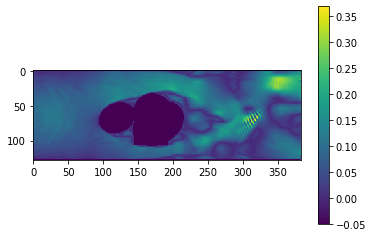

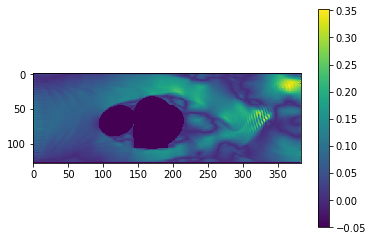

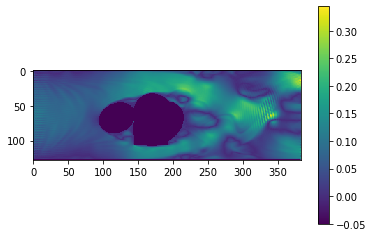

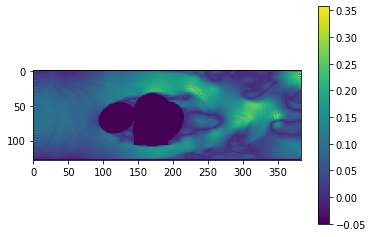

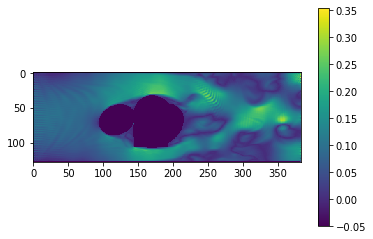

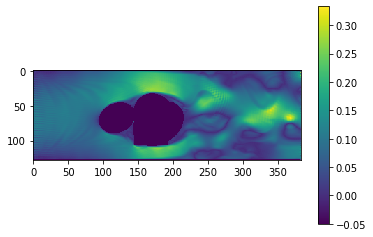

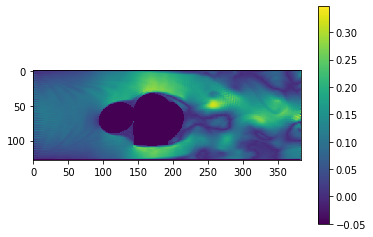

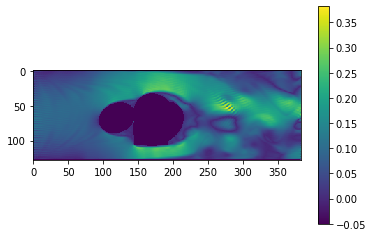

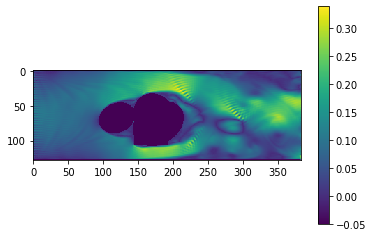

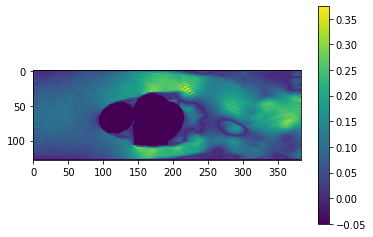

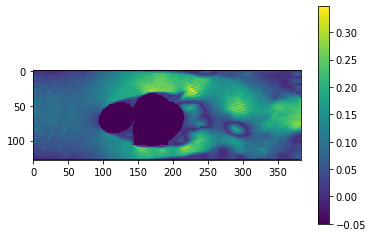

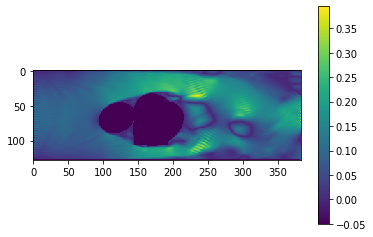

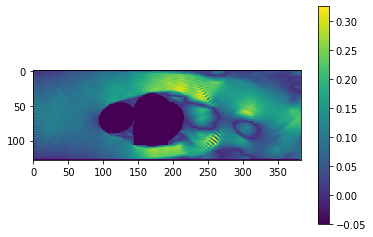

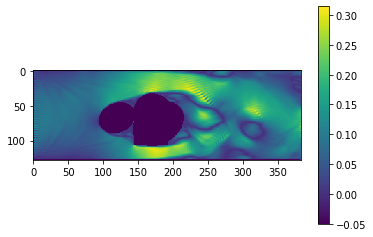

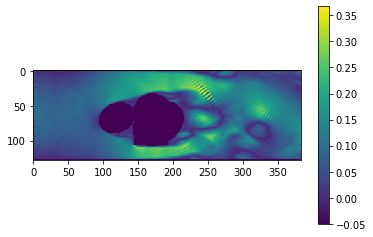

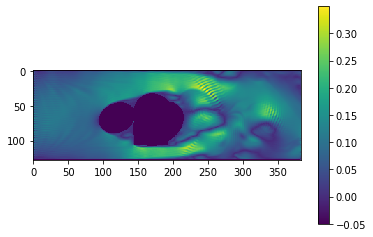

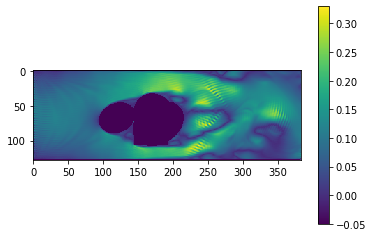

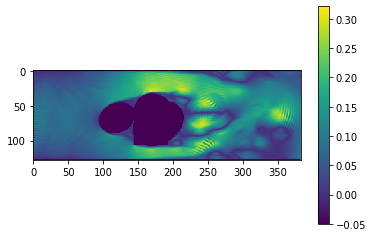

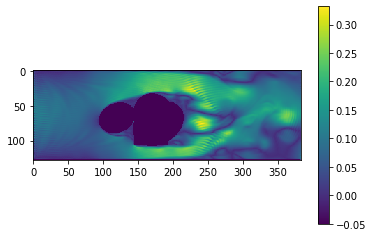

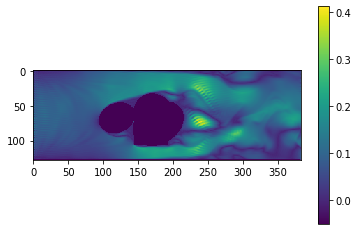

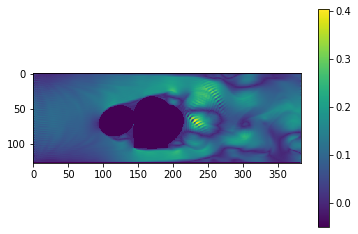

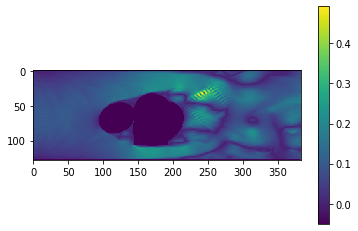

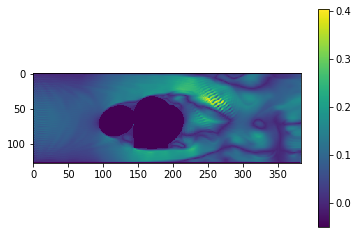

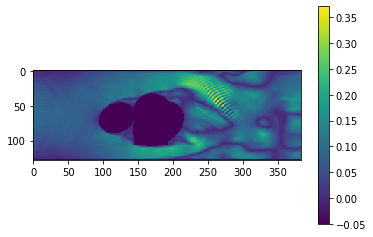

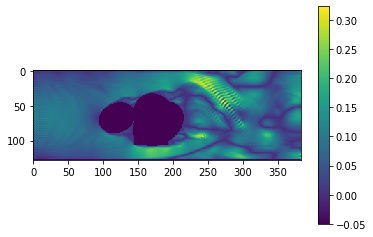

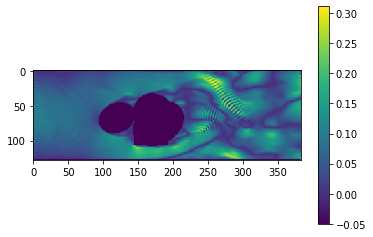

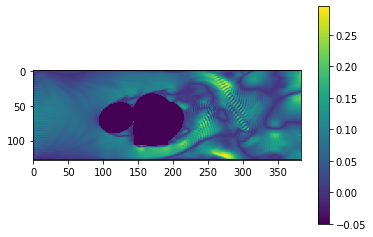

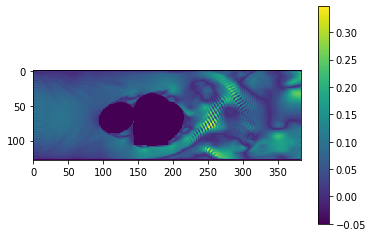

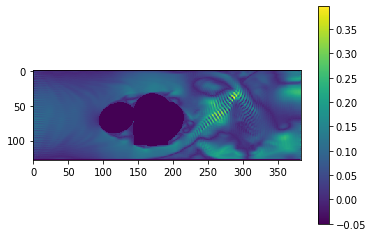

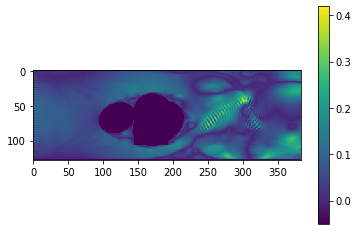

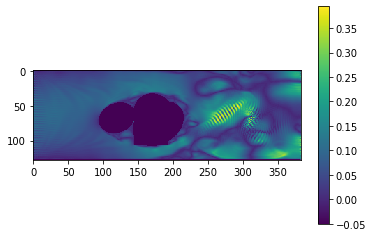

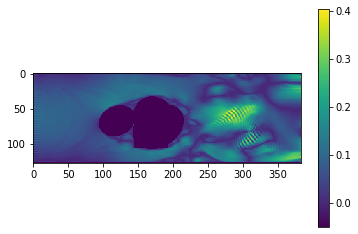

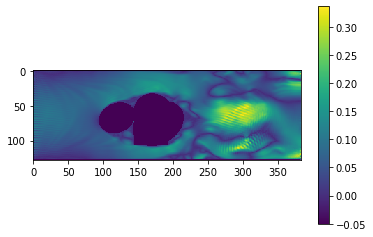

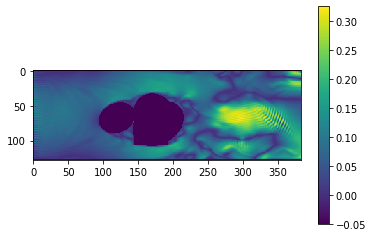

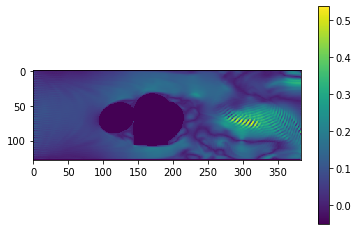

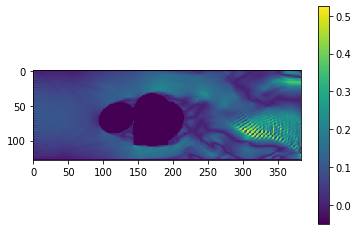

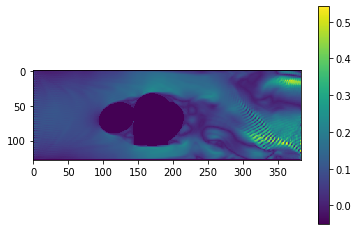

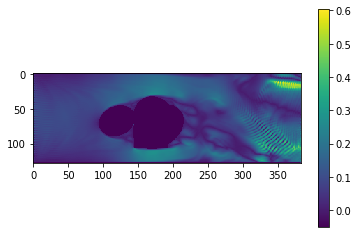

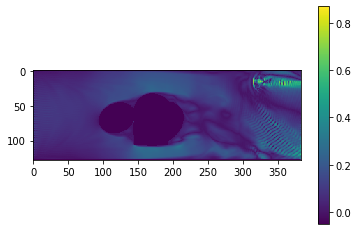

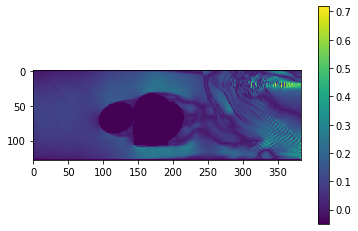

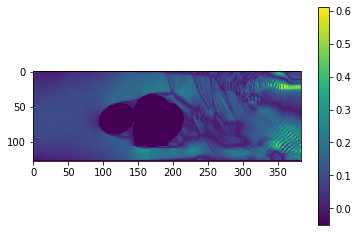

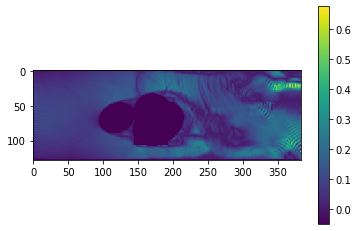

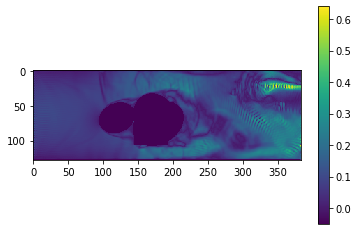

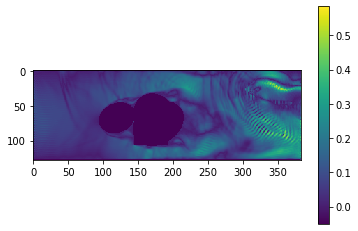

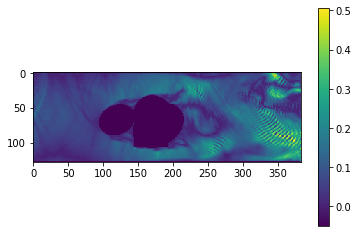

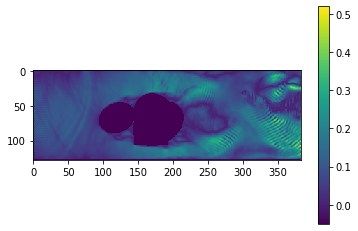

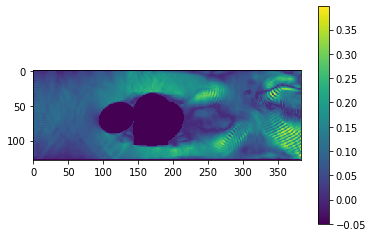

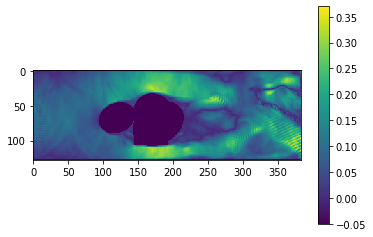

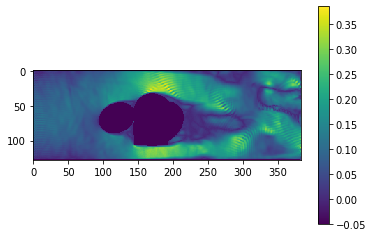

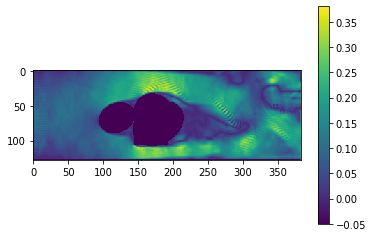

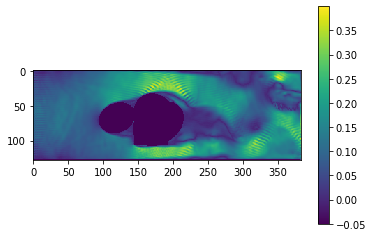

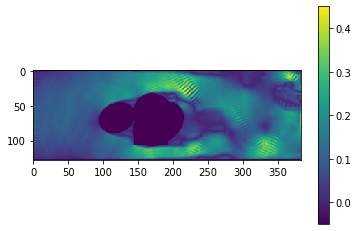

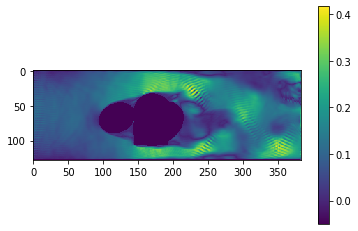

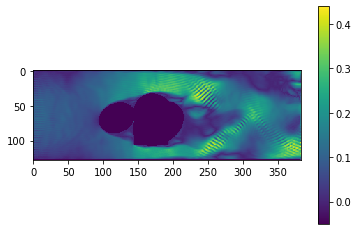

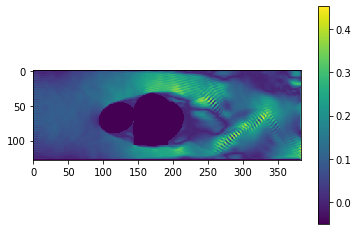

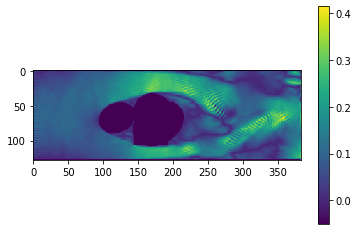

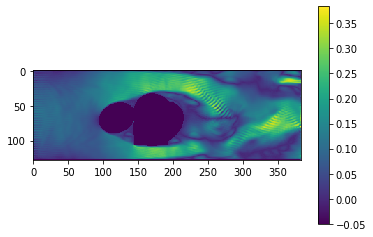

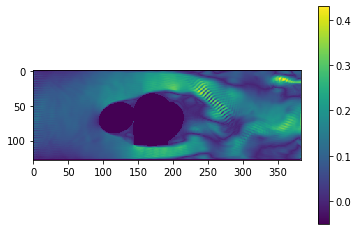

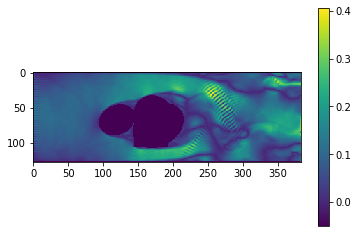

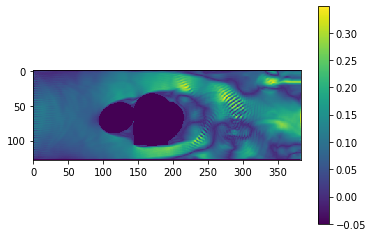

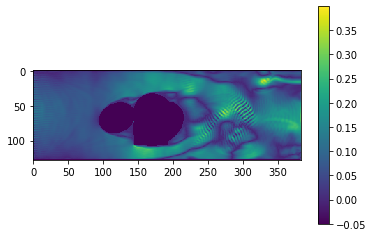

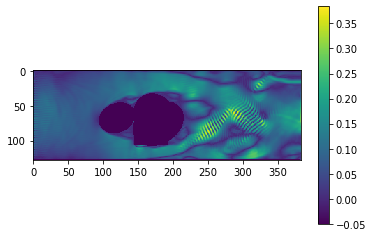

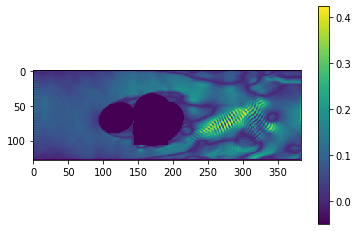

In [5]:
path="/home/changgeonlee/mechsys/tflbm/flow_data/"
shape = [128, 384]
class_names = os.listdir(path)
class_names.sort()
for idx, classname in enumerate(class_names):
    
    h5_path = path+classname
    dataH5 = h5py.File(h5_path)
    
    key_list = dataH5.keys()
    flow = np.array(dataH5['Velocity_0'][:])
    flow = flow.reshape([shape[0], shape[1], 3])[0:shape[0],0:shape[1],0:2]
    
    boundary = np.array(dataH5['Gamma'][:])
    boundary = boundary.reshape([shape[0], shape[1], 1])[0:shape[0],0:shape[1],:]

    sflow_plot = np.concatenate([flow], axis=1)
    boundary_concat = np.concatenate(3*[boundary], axis=2)
    sflow_plot = np.sqrt(np.square(sflow_plot[:,:,0])) - .05 *boundary_concat[:,:,0]
    
    plt.imshow(sflow_plot)
    plt.colorbar()
    plt.show() 